In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Reading the data

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape # Reading the shape of the data

(891, 12)

* There are 891 rows and 12 variables in the titanic dataset.

# Understanding the categorical and numerical variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Categorical Variables

In [6]:
df.select_dtypes(include=['number']).columns
print("The categorical columns in the titanic dataset are:",list(df.select_dtypes(include=['number']).columns))

The categorical columns in the titanic dataset are: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


* Numerical Variables

In [7]:
df.select_dtypes(exclude=['number']).columns
print("The numerical columns in the titanic dataset are:",list(df.select_dtypes(exclude=['number']).columns))

The numerical columns in the titanic dataset are: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


* Checking if there are any null values present in the dataset

# For checking how many unique values each variable contains

In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

# Checking the null values in the dataset

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* There are 177 null values in the Age attribute, 687 in the Cabin attribute and 2 in the Embarked.

# Measures of Central Tendency

## Mean

In [10]:
print("The mean values for the numeric variables in the data are:\n", df.mean())

The mean values for the numeric variables in the data are:
 PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64


* The average age of people who were travelling in Titanic was 29.7 years and average Fare was 32.20 dollars.

## Median

In [11]:
print("The median values for the numeric variables are:\n", df.median())

The median values for the numeric variables are:
 PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64


* There are 50% people who's age is less than 28 years and there are 50% people whos's age is more than 28 years.
* As the median Pclass, we can comprehend that the no of people travelling in 1 and 2 class was less than people travelling 3rd
    class

## Mode

In [12]:
df_cat=df.select_dtypes(exclude=['number'])
print("The mode values for the numeric variables in the data are:\n", df_cat.mode().head()[['Sex','Ticket','Cabin','Embarked']])

The mode values for the numeric variables in the data are:
     Sex    Ticket        Cabin Embarked
0  male      1601      B96 B98        S
1   NaN    347082  C23 C25 C27      NaN
2   NaN  CA. 2343           G6      NaN
3   NaN       NaN          NaN      NaN
4   NaN       NaN          NaN      NaN


In [13]:
df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [14]:
df_cat.describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Danbom, Mr. Ernst Gilbert",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


* We see that the number of males was more in the ship as compared to the females( 577 males).
* The count of the ticket 1601 is highest i.e. that there were many people who possessed ticket 1601.
* Cabin G6 has the maximum frequency.
* Around 644 boarded the ship on Southampton port.

## Getting count of all the columns in the data

1. The variable **Sex**

In [15]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

* According the information, there are 577 males and 314 in the ship.

2. The variable **PClass**

In [16]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

* We can see that there are three Passenger classes, 491 people are travelling in 3rd class, 184 are travelling in the 2nd class
and 184 people in 1st class.

3. The variable **Survived**

In [17]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

* It can be clearly interpreted with reference to the data that only 342 people were able to save their lives and around 549 lost
their lives.

4. The variable **Embarked**

In [18]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

* We can clearly see that 644 people boarded ship on Southampton port, 168 people on Cherbourg port and 77 people on Qeenstown.

5. The variable **SibSp**

In [19]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

6. The variable **Parch**

In [20]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

7. The variable **Ticket**

In [21]:
df['Ticket'].value_counts()

1601         7
CA. 2343     7
347082       7
3101295      6
CA 2144      6
            ..
312992       1
A4. 54510    1
28664        1
36963        1
2628         1
Name: Ticket, Length: 681, dtype: int64

8. The variable **Fare**

In [22]:
df['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

9. The variable **Cabin**

In [23]:
df['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
C22 C26        3
              ..
B4             1
B71            1
A19            1
A6             1
A5             1
Name: Cabin, Length: 147, dtype: int64

## Quantiles

In [24]:
df.quantile(0.25)

PassengerId    223.5000
Survived         0.0000
Pclass           2.0000
Age             20.1250
SibSp            0.0000
Parch            0.0000
Fare             7.9104
Name: 0.25, dtype: float64

In [25]:
df.quantile(0.50)

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
Name: 0.5, dtype: float64

In [26]:
df.quantile(0.75)

PassengerId    668.5
Survived         1.0
Pclass           3.0
Age             38.0
SibSp            1.0
Parch            0.0
Fare            31.0
Name: 0.75, dtype: float64

# Measures of Central Tendency

1. **Range**

In [27]:
df_num=df.select_dtypes(include=['number'])

In [28]:
df_num.max()

PassengerId    891.0000
Survived         1.0000
Pclass           3.0000
Age             80.0000
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64

In [29]:
df_num.min()

PassengerId    1.00
Survived       0.00
Pclass         1.00
Age            0.42
SibSp          0.00
Parch          0.00
Fare           0.00
dtype: float64

In [30]:
print(df_num.max()-df_num.min())

PassengerId    890.0000
Survived         1.0000
Pclass           2.0000
Age             79.5800
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64


* It can be interpreted that the oldest person in the ship is one having the age of 80 and years the youngest one has age 0.42 years
* The highest fare being paid is 512.3292 dollars.

2. **Variance**

In [31]:
df.var()

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

* Attribute PassengerId has the highest variance as it contains all the unique values whereas the attribute Survived has the
least variance as it have only two values i.e. 0 or 1.

3. **Standard Deviation**

In [32]:
df.std()

PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

In [33]:
#*

4. **InterQuartileRange**

In [34]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Age             17.8750
SibSp            1.0000
Parch            0.0000
Fare            23.0896
dtype: float64


* Smaller the value of IQR, smaller is the dispersion, therefore only PassengerId column have the highest dispersion.

5. **Cofficient of Variation**

In [35]:
from scipy.stats import variation  
for i in df_num.columns:
    print(i,":", scipy.stats.variation(df[i],nan_policy='omit'))

PassengerId : 0.5767026523069557
Survived : 1.266989801811655
Pclass : 0.3619452225232131
Age : 0.4887795429927496
SibSp : 2.107280840481879
Parch : 2.1111583596161525
Fare : 1.5422063630081666


# Distribution of Data

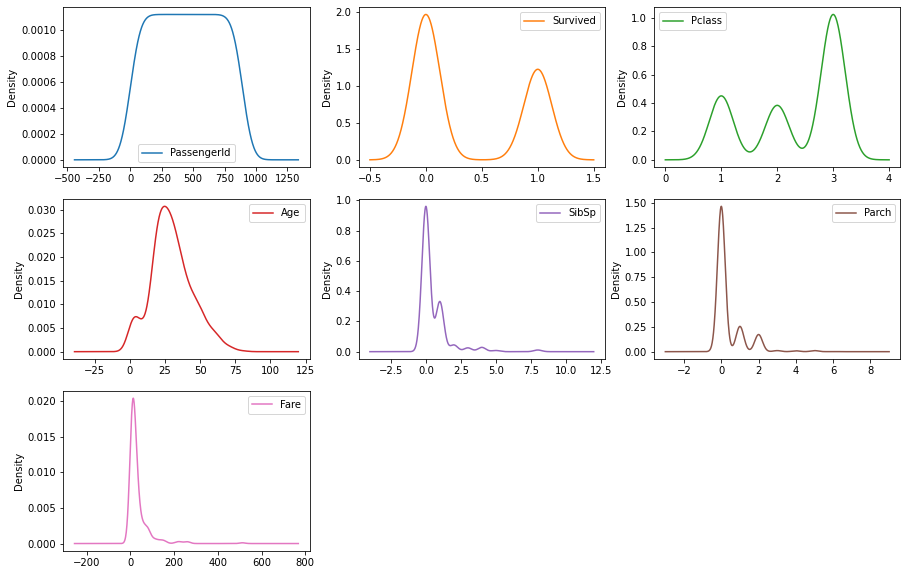

In [36]:
plt.rcParams["figure.figsize"] = [15,10]
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

# Skewness of the data

In [37]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

* **Postively Skewed**: PassengerId,Survived,Age,SibSp,Parch,Fare
* **Negatively Skewed**: Pclass  

# Univariate Analysis

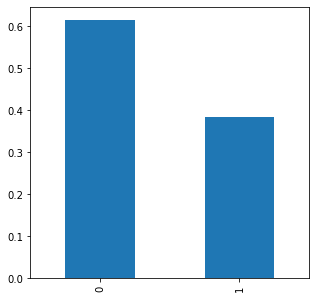

In [38]:
plt.figure(figsize=[5,5])
df['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.show()

* It can be interpreted from the above graph that the ratio between the Survived and Not survived is 60:40.

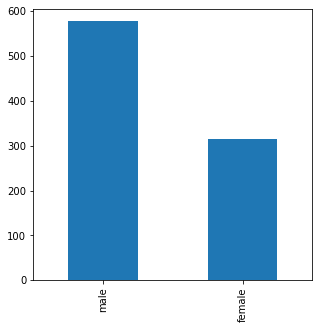

In [39]:
plt.figure(figsize=[5,5])
df['Sex'].value_counts().plot(kind='bar')
plt.show()

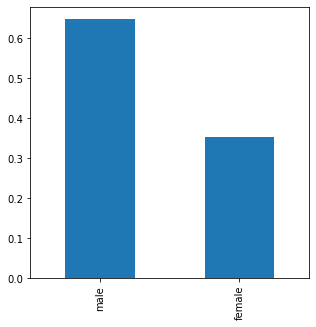

In [40]:
plt.figure(figsize=[5,5])
df['Sex'].value_counts(normalize=True).plot(kind='bar')
plt.show()

* There are more males travelling in the ship as compared to the females. The ratio of Males to Females is around 65 to 35

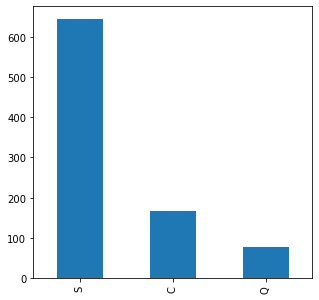

In [41]:
plt.figure(figsize=[5,5])
df['Embarked'].value_counts().plot(kind='bar')
plt.show()

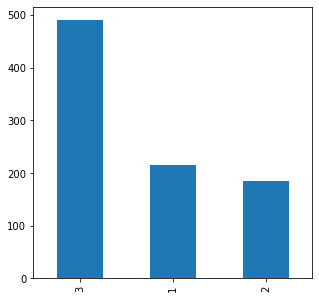

In [42]:
plt.figure(figsize=[5,5])
df['Pclass'].value_counts().plot(kind='bar')
plt.show()

* 3rd class is almost equivalent to the total of 1st class and 2nd class.

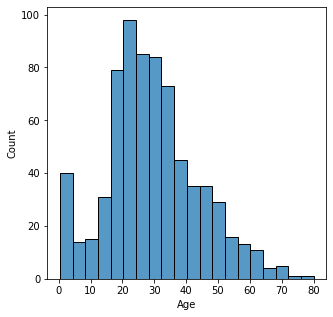

In [43]:
plt.figure(figsize=[5,5])
sns.histplot(df['Age'])
plt.show()

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


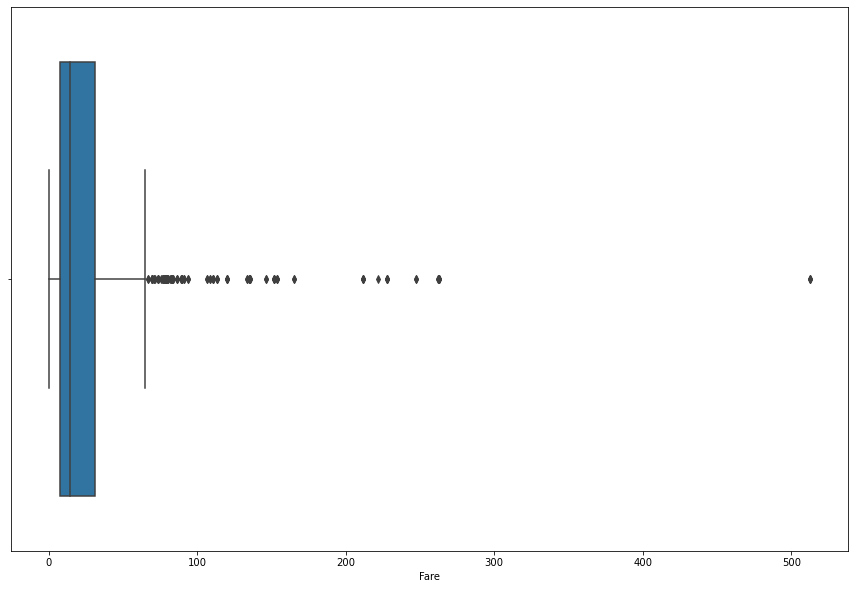

In [44]:
sns.boxplot(df['Fare'])
plt.show()

* Mostly people were from age 20 to 35.

# Multivariate Analysis

In [45]:
pd.crosstab(df['Sex'],df['Survived'],margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


* It can be interpreted that more no. of males lost their lives as compared to the females. Statistically, 468 males 
los their lives whereas 81 females lost their lives.

In [46]:
df.groupby('Survived')['Sex'].value_counts(1)

Survived  Sex   
0         male      0.852459
          female    0.147541
1         female    0.681287
          male      0.318713
Name: Sex, dtype: float64

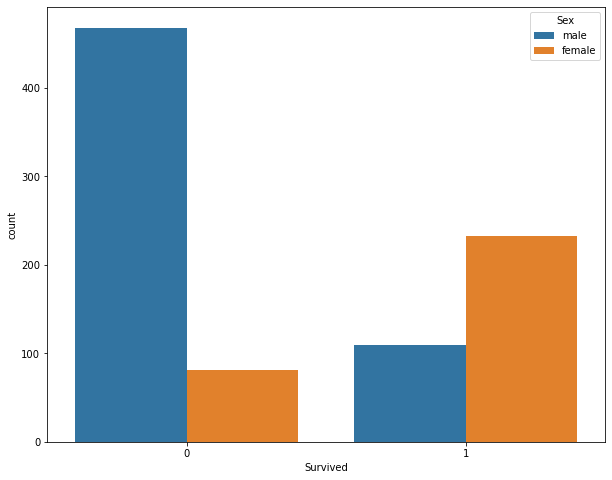

In [47]:
plt.figure(figsize=[10,8])
sns.countplot(x=df['Survived'],hue=df['Sex'])
plt.show()

In [48]:
pd.crosstab(df['Pclass'],df['Survived'],margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


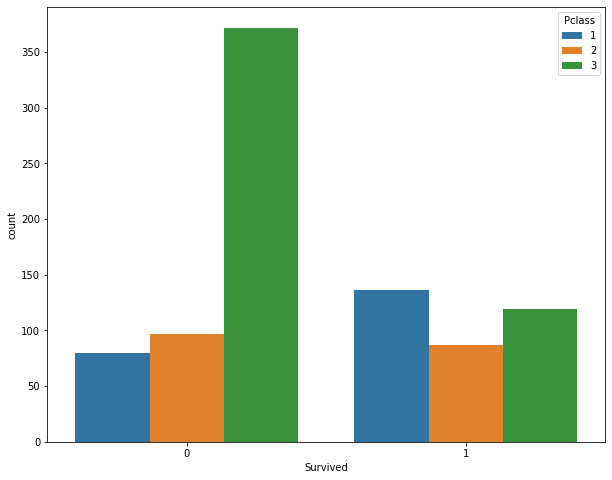

In [49]:
plt.figure(figsize=[10,8])
sns.countplot(x=df['Survived'],hue=df['Pclass'])
plt.show()

* According the plot, the highest number of people loosing their lives were from 3rd Pclass.

In [50]:
pd.crosstab(df['Embarked'],df['Survived'],margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


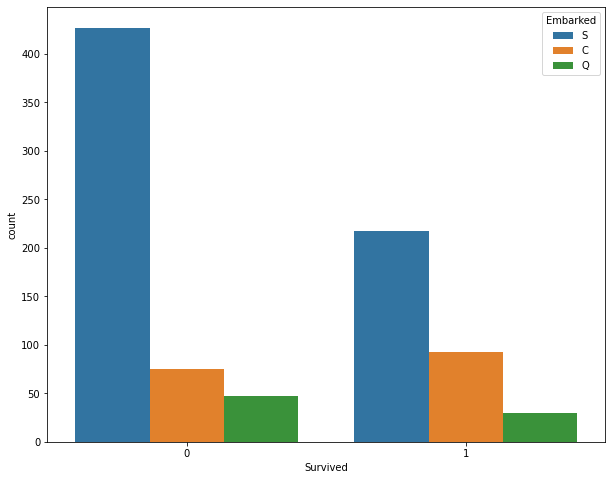

In [51]:
plt.figure(figsize=[10,8])
sns.countplot(x=df['Survived'],hue=df['Embarked'])
plt.show()

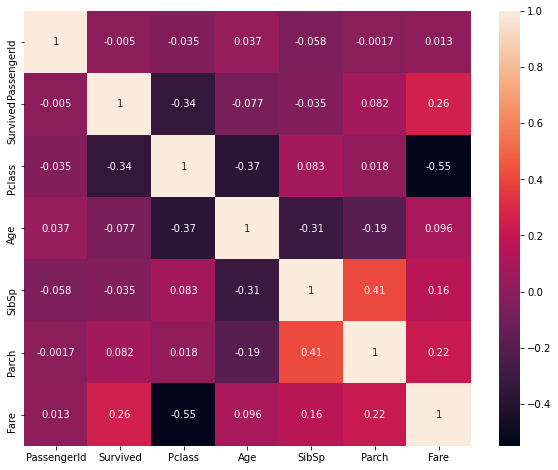

In [52]:
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(),annot=True)
plt.show()

* There's a weak but positive correlation between Fare and Survived attribute.

# Null Value Treatment

In [53]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [54]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [55]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [56]:
df['Embarked'].isnull().sum()

2

In [57]:
df['Embarked'].mode()

0    S
dtype: object

In [58]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [59]:
df = df.drop('Cabin', axis=1)

In [60]:
df['Age'].isnull().sum()

177

In [61]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [62]:
df[df['Age'].isnull()]['Pclass'].value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

In [63]:
df[df['Age'].isnull()]['Sex'].value_counts()

male      124
female     53
Name: Sex, dtype: int64

In [64]:
df.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [65]:
df.loc[(df['Age'].isnull()) & (df['Pclass']==3) & (df['Sex']=='male'),'Age']=26.507589
df.loc[(df['Age'].isnull()) & (df['Pclass']==3) & (df['Sex']=='female'),'Age']=21.750000

In [66]:
df.loc[(df['Age'].isnull()) & (df['Pclass']==2) & (df['Sex']=='male'),'Age']=30.740707
df.loc[(df['Age'].isnull()) & (df['Pclass']==2) & (df['Sex']=='female'),'Age']=28.722973

In [67]:
df.loc[(df['Age'].isnull()) & (df['Pclass']==1) & (df['Sex']=='male'),'Age']=  41.281386
df.loc[(df['Age'].isnull()) & (df['Pclass']==1) & (df['Sex']=='female'),'Age']=34.611765

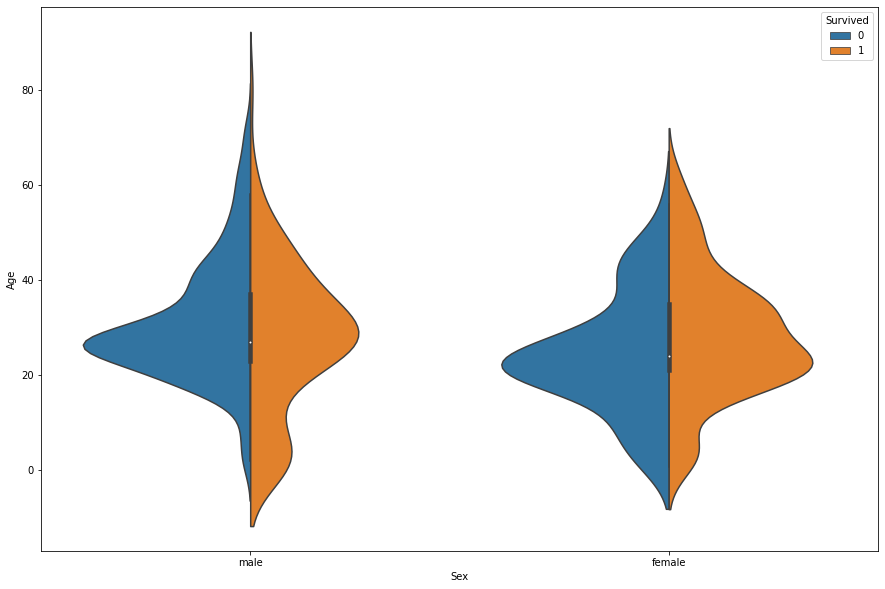

In [68]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", 
data = df, split = True)
plt.show()

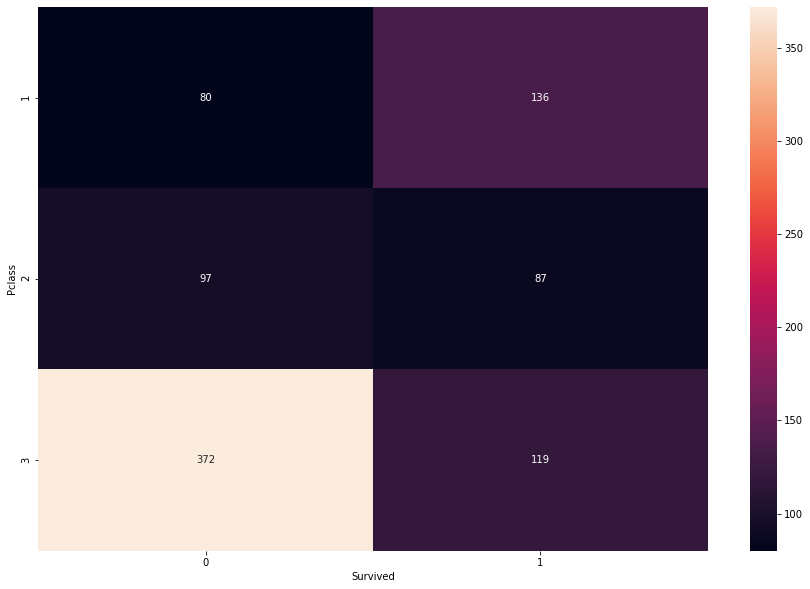

In [69]:
sns.heatmap(df.groupby(['Pclass', 'Survived']).size().unstack(), annot = True, fmt ="d")

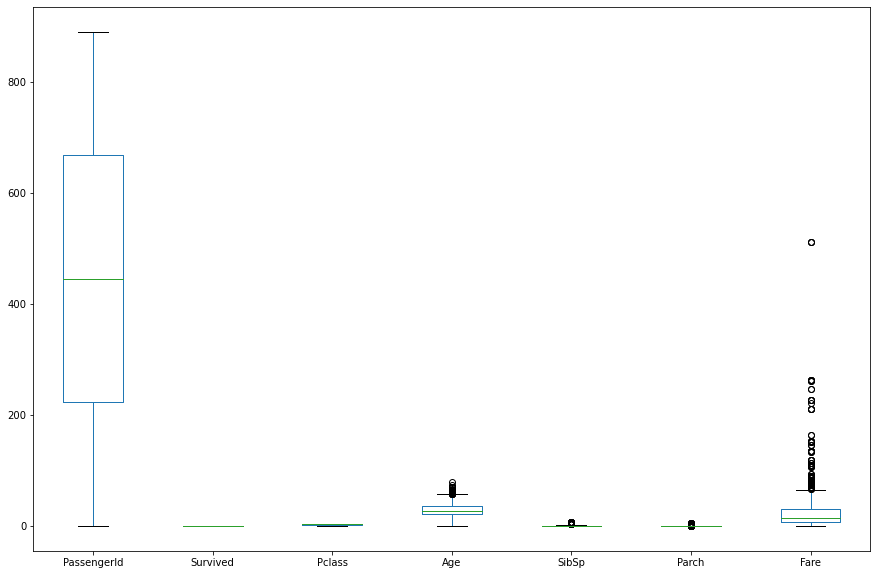

In [70]:
numerical_column=df.select_dtypes(include=['number']).columns
df[numerical_column].plot.box()
plt.show()

In [71]:
df.tail(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
883,884,0,2,"Banfield, Mr. Frederick James",male,28.00,0,0,C.A./SOTON 34068,10.500,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.00,0,0,SOTON/OQ 392076,7.050,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.00,0,5,382652,29.125,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.450,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.000,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.00,0,0,370376,7.750,Q


# Outlier Treatment

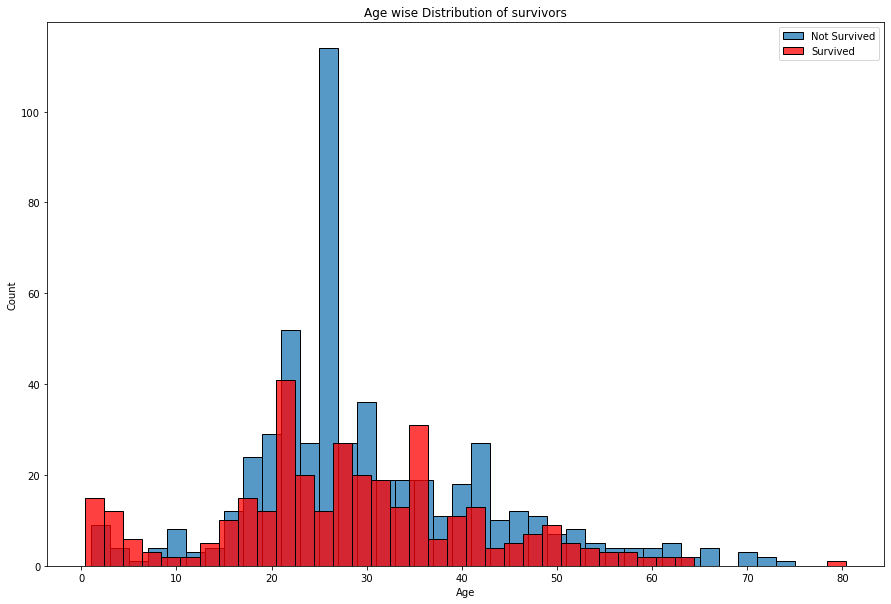

In [72]:
sns.histplot(df[(df['Survived'] == 0)]['Age'],binwidth=2)
sns.histplot(df[(df['Survived'] == 1)]['Age'],color='r',binwidth=2)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of survivors')
plt.legend(['Not Survived','Survived'])
plt.show()

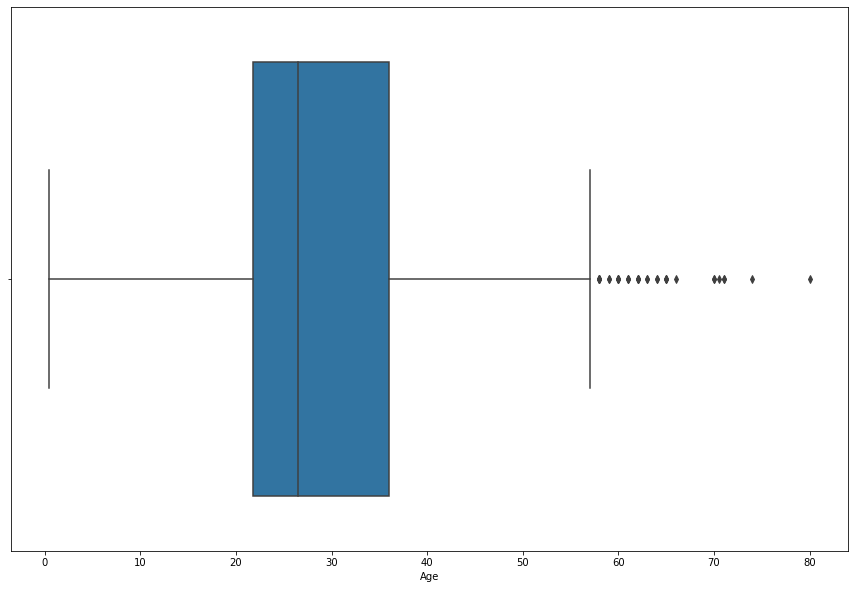

In [73]:
sns.boxplot(x=df['Age'])
plt.show()

In [74]:
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
IQR

14.25

In [75]:
df[(df['Age']>Q3+(1.5*IQR)) | (df['Age']<Q1-(1.5*IQR))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,S
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,C
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5000,S
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,S


In [76]:
from scipy import stats
z = (stats.zscore(df['Age']))
sd_3 = df[z>3].index
sd_3neg = df[z<(-3)].index

In [77]:
sd_3

Int64Index([96, 116, 493, 630, 672, 745, 851], dtype='int64')

In [78]:
sd_3neg

Int64Index([], dtype='int64')

In [79]:
index_of_age80=df[df['Age']==80].index
index_of_age80

Int64Index([630], dtype='int64')

In [80]:
df[z>3]['Age'].drop(index_of_age80).index

Int64Index([96, 116, 493, 672, 745, 851], dtype='int64')

In [81]:
index_of_restoutliers=df[z>3]['Age'].drop(index_of_age80).index

In [82]:
np.random.seed(2)
caps = np.random.randint(65,69,size=6)
caps

array([65, 68, 66, 65, 67, 68])

In [83]:
df.loc[index_of_restoutliers, 'Age'] = caps

In [84]:
df=df.drop(index_of_age80)

# Feature Engineering

In [85]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [86]:
df['Fare']=pd.cut(df['Fare'], bins= [0.0,10.0,100.0,513.0], labels=[1,2,3])

In [87]:
df['Family']=df['SibSp']+df['Parch']+1

In [88]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)

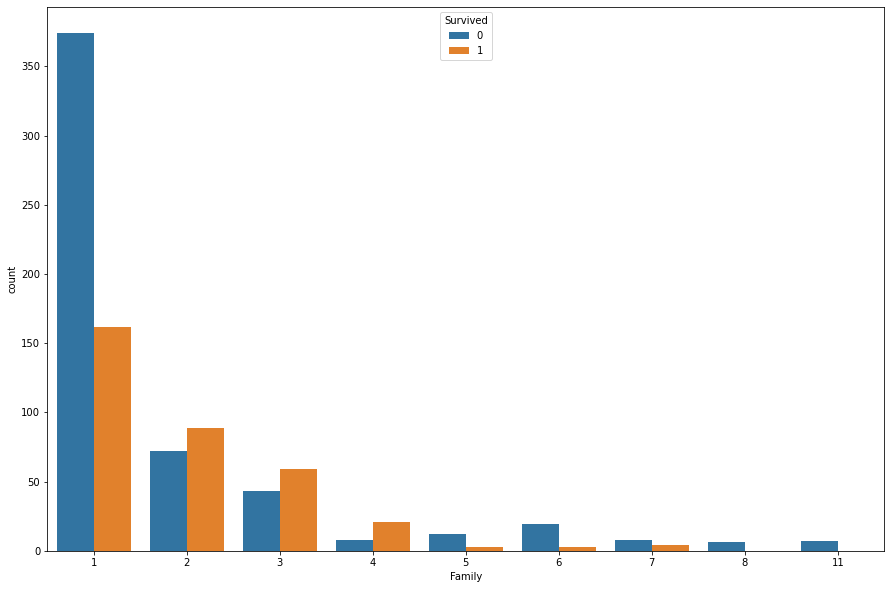

In [89]:
sns.countplot(x = "Family", hue="Survived", data=df)
plt.show()

In [90]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [91]:
df['Title']=df['Name'].str.split(',').str[1].str.split('.').str[0]
# df[['Title','F_Name','None']]=df['FN'].str.split('.',expand=True)

In [92]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,1,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,2,C,2,Mrs


In [93]:
df['Title'].value_counts()

 Mr              516
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Col               2
 Major             2
 Ms                1
 the Countess      1
 Lady              1
 Jonkheer          1
 Don               1
 Mme               1
 Sir               1
 Capt              1
Name: Title, dtype: int64

In [94]:
titles_other = [' Don', ' Rev', ' Dr',' Major', ' Lady', ' Sir', ' Col', ' Capt',
       ' the Countess', ' Jonkheer']

In [95]:
df['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [96]:
title = df['Title'].replace(to_replace=titles_other,value='Others' )

In [97]:
title.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', 'Others', ' Mme', ' Ms',
       ' Mlle'], dtype=object)

In [98]:
df['Title']= title.replace({' Mme':' Mrs'}).replace({' Mlle':' Ms'}).replace(' Miss', ' Ms')

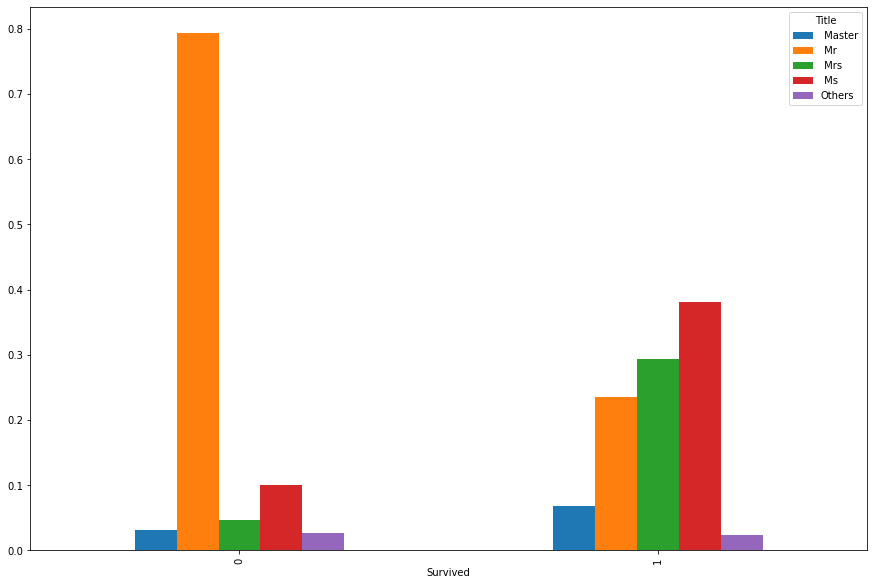

In [99]:
pd.crosstab(df['Survived'], df['Title'],normalize='index').plot.bar()
plt.show()

In [100]:
df.drop('Name',axis=1,inplace=True)

In [101]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Family,Title
0,1,0,3,male,22.0,A/5 21171,1,S,2,Mr
1,2,1,1,female,38.0,PC 17599,2,C,2,Mrs
2,3,1,3,female,26.0,STON/O2. 3101282,1,S,1,Ms
3,4,1,1,female,35.0,113803,2,S,2,Mrs
4,5,0,3,male,35.0,373450,1,S,1,Mr


# Encoding

In [102]:
df= pd.concat([df,pd.get_dummies(df['Sex'],drop_first=True)], axis=1)

In [103]:
df.drop('Ticket',axis=1,inplace=True)

In [104]:
df.head(2)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Title,male
0,1,0,3,male,22.0,1,S,2,Mr,1
1,2,1,1,female,38.0,2,C,2,Mrs,0


In [105]:
df['Title']=df['Title'].fillna(' Mrs')

In [106]:
df['Title'].value_counts()

 Mr        516
 Ms        185
 Mrs       126
 Master     40
Others      23
Name: Title, dtype: int64

In [107]:
df['Title']=df['Title'].map({ ' Mr' : 5,' Ms': 4,' Mrs': 3 ,' Master': 2,'Others': 1})

In [108]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Title,male
0,1,0,3,male,22.0,1,S,2,5,1
1,2,1,1,female,38.0,2,C,2,3,0
2,3,1,3,female,26.0,1,S,1,4,0
3,4,1,1,female,35.0,2,S,2,3,0
4,5,0,3,male,35.0,1,S,1,5,1


In [109]:
df['Embarked'].value_counts(1)

S    0.724719
C    0.188764
Q    0.086517
Name: Embarked, dtype: float64

In [110]:
df['Embarked']=df['Embarked'].map({'S':0.724719,'C':0.188764,'Q':0.086517})

In [111]:
df.drop(['PassengerId','Sex'],axis=1,inplace=True)

In [112]:
df.rename({'male':'Sex'},axis=1,inplace=True) 
#for male=1 and for female=0

In [113]:
df.head()

,Survived,Pclass,Age,Fare,Embarked,Family,Title,Sex
0,0,3,22.0,1,0.724719,2,5,1
1,1,1,38.0,2,0.188764,2,3,0
2,1,3,26.0,1,0.724719,1,4,0
3,1,1,35.0,2,0.724719,2,3,0
4,0,3,35.0,1,0.724719,1,5,1
